<a href="https://colab.research.google.com/github/YueCyuan/big-data/blob/master/1022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
install.packages("SportsAnalytics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
library(SportsAnalytics)
library(ggplot2)

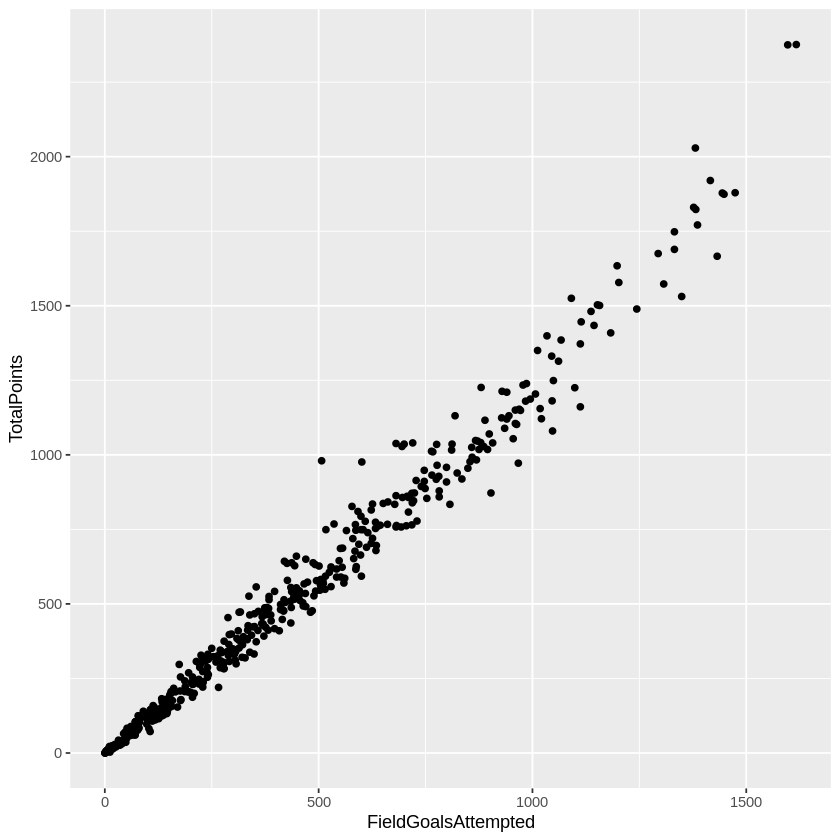

In [11]:
NBA1516<-fetch_NBAPlayerStatistics("15-16")
qplot(FieldGoalsAttempted,TotalPoints,data=NBA1516)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



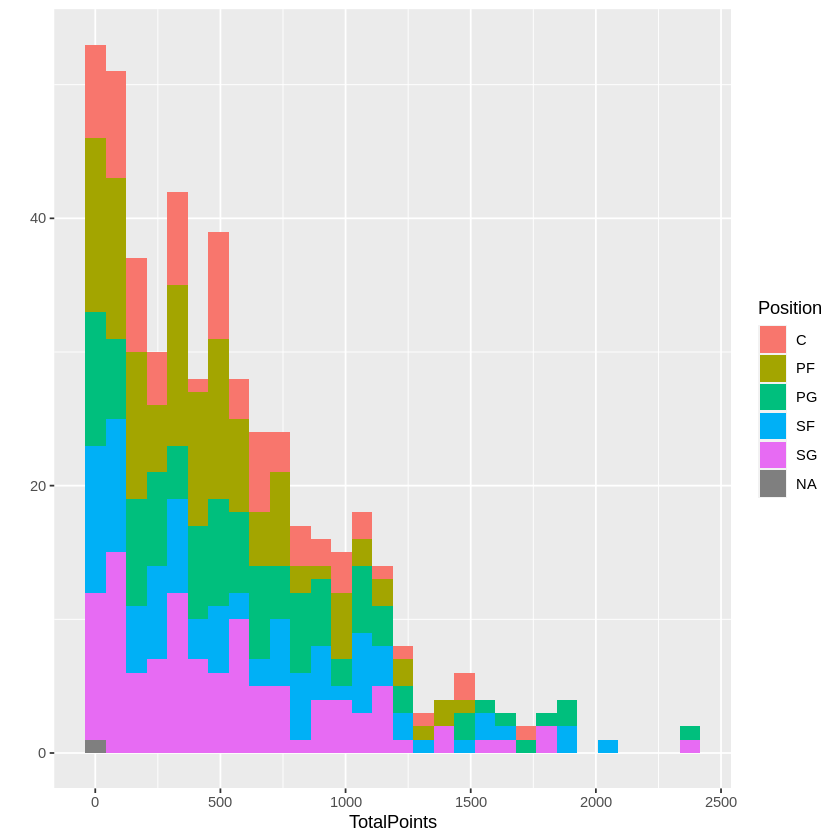

In [12]:
qplot(TotalPoints, data = NBA1516, fill = Position)

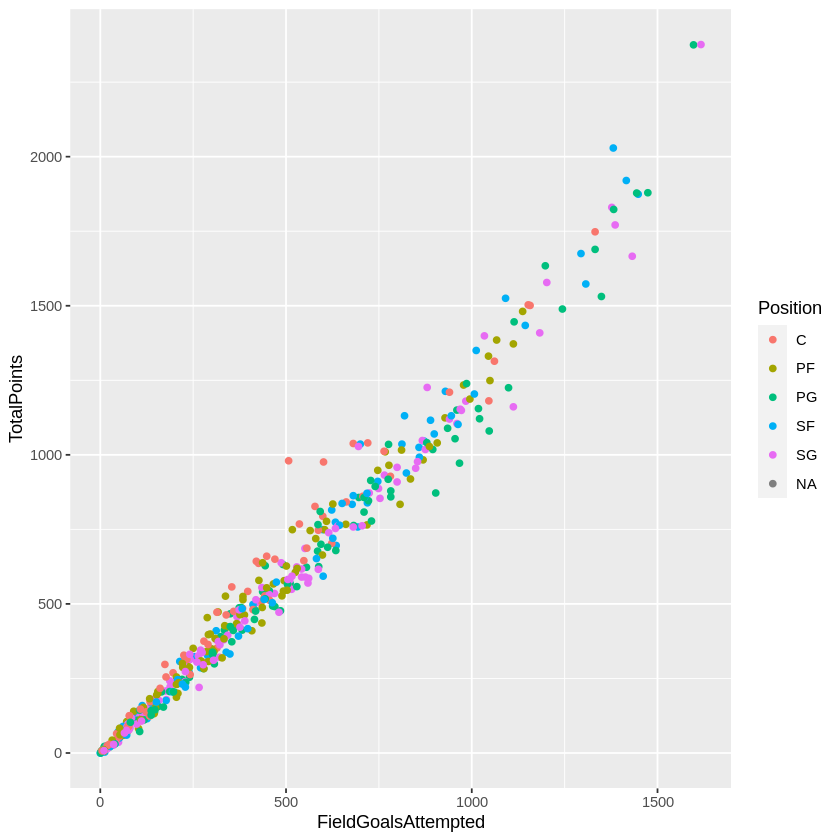

In [13]:
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516,color=Position)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



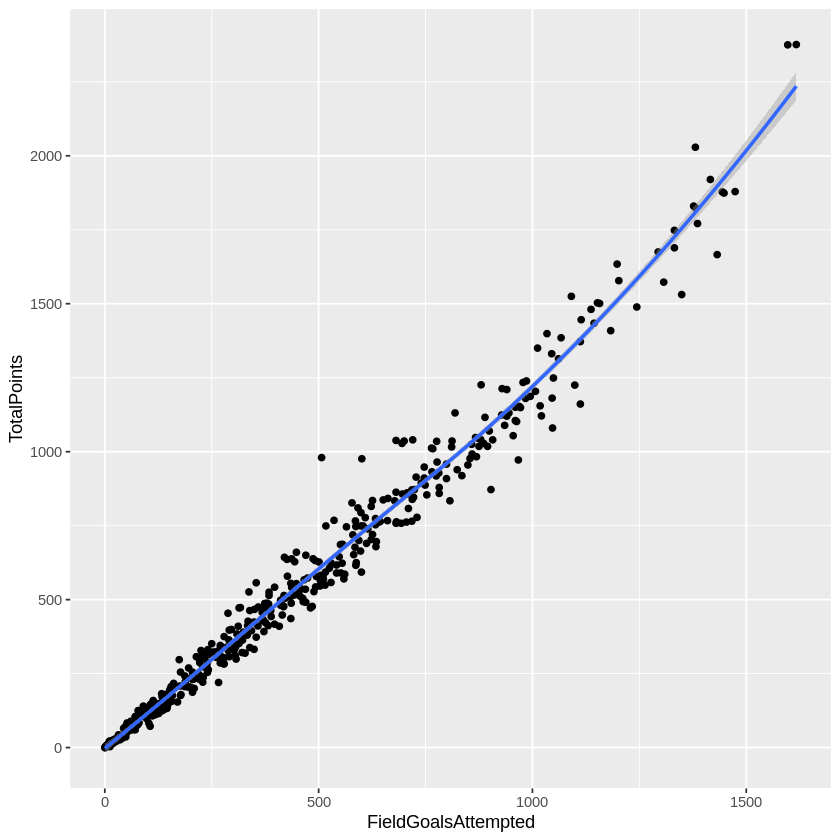

In [14]:
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516,
geom = c("point", "smooth"))

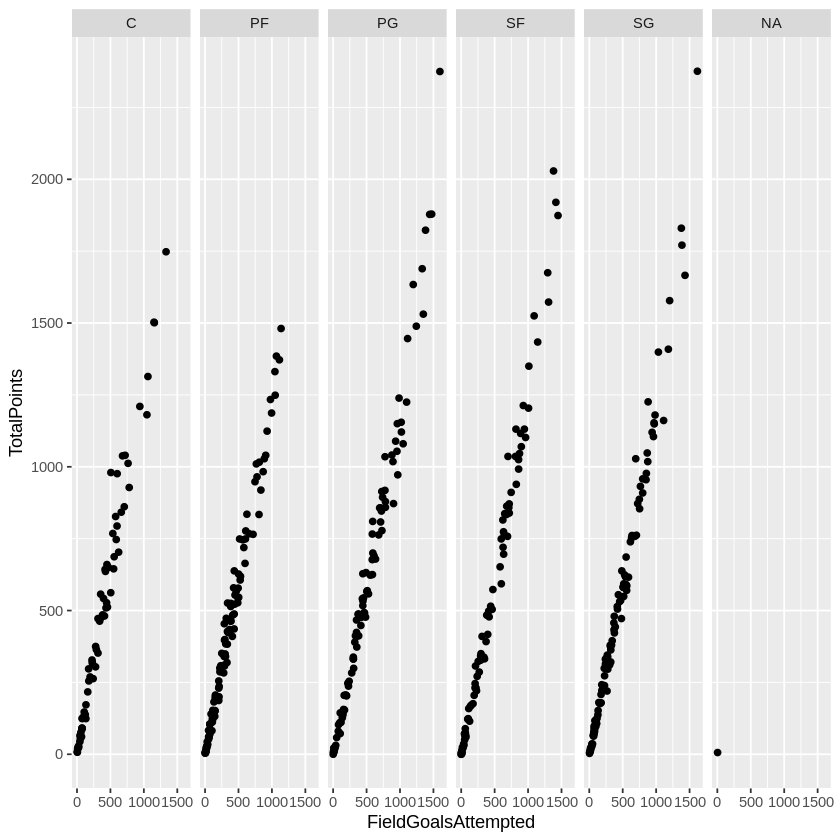

In [15]:
qplot(FieldGoalsAttempted,TotalPoints,data=NBA1516,facets=.~Position)

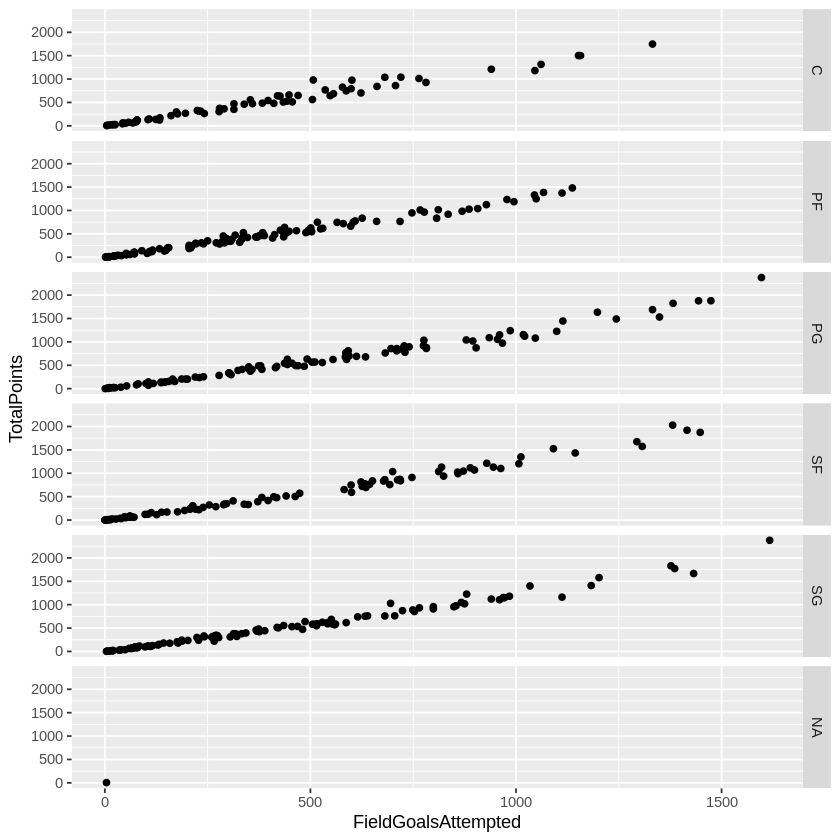

In [16]:
qplot(FieldGoalsAttempted,TotalPoints,data=NBA1516,facets=Position~.)

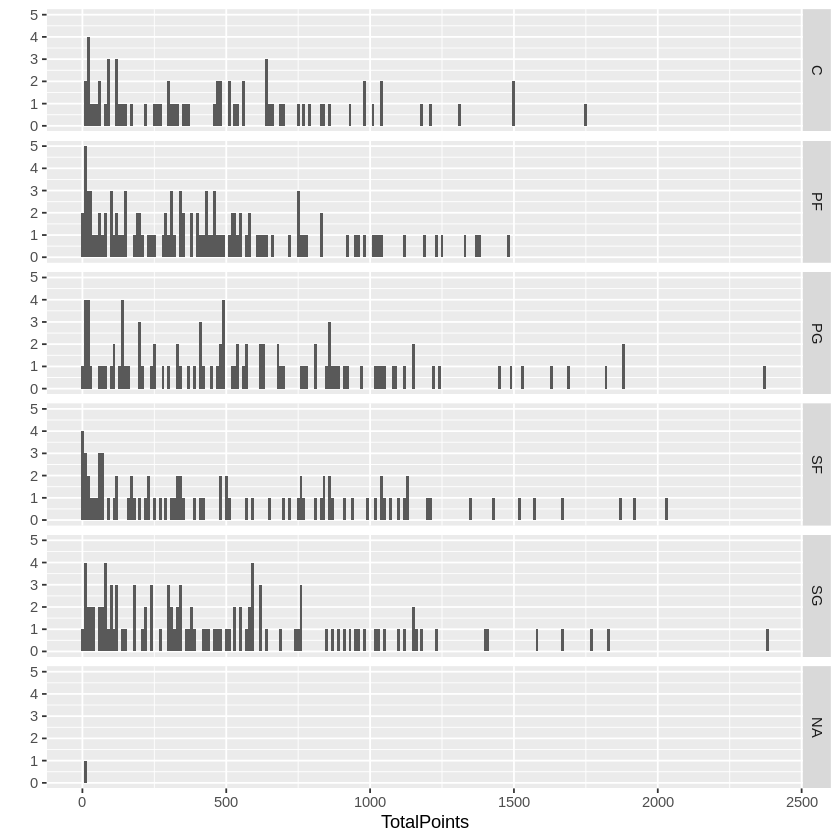

In [20]:
qplot(TotalPoints,data=NBA1516,facets=Position~.,binwidth=10)

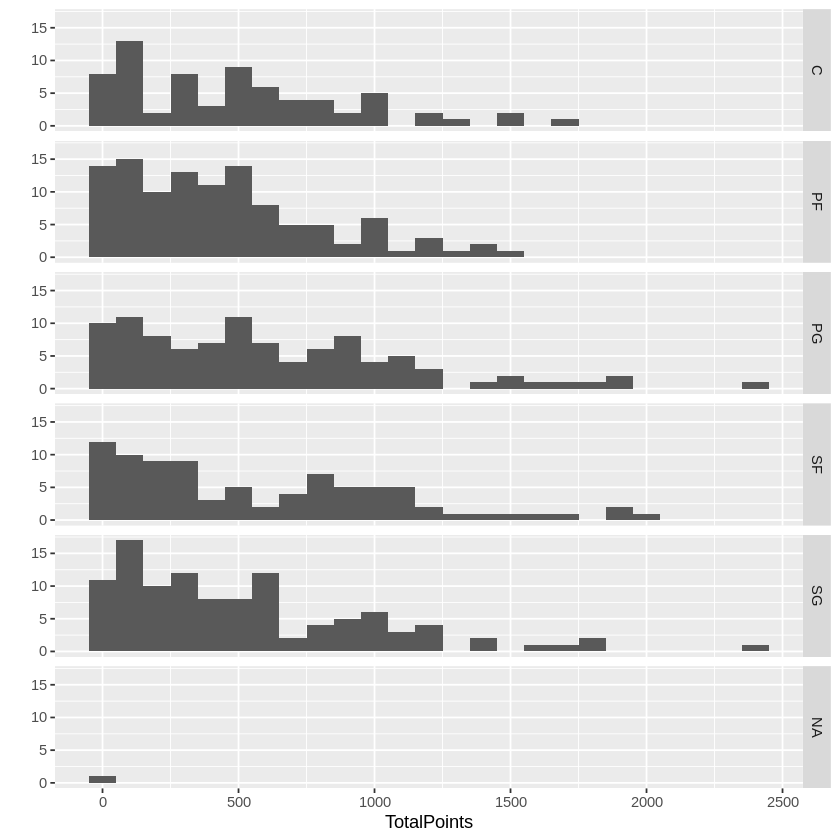

In [21]:
qplot(TotalPoints,data=NBA1516,facets=Position~.,binwidth=100)

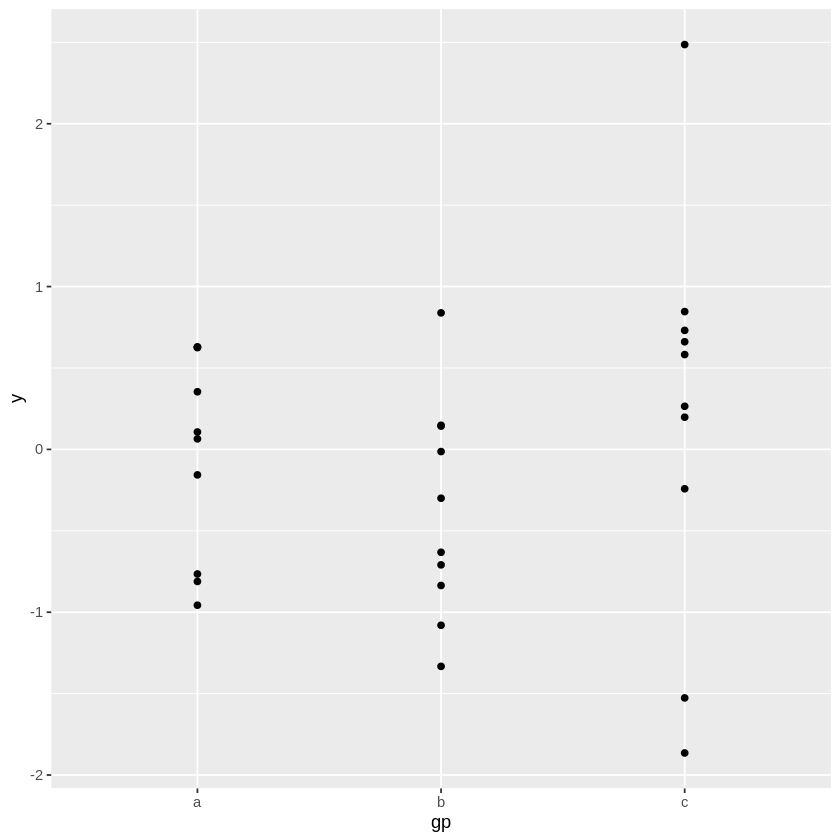

In [18]:
library(ggplot2)
df <-data.frame(gp = factor(rep(letters[1:3],each = 10)),y=rnorm(30))
ggplot(df,aes(x=gp,y=y))+geom_point()

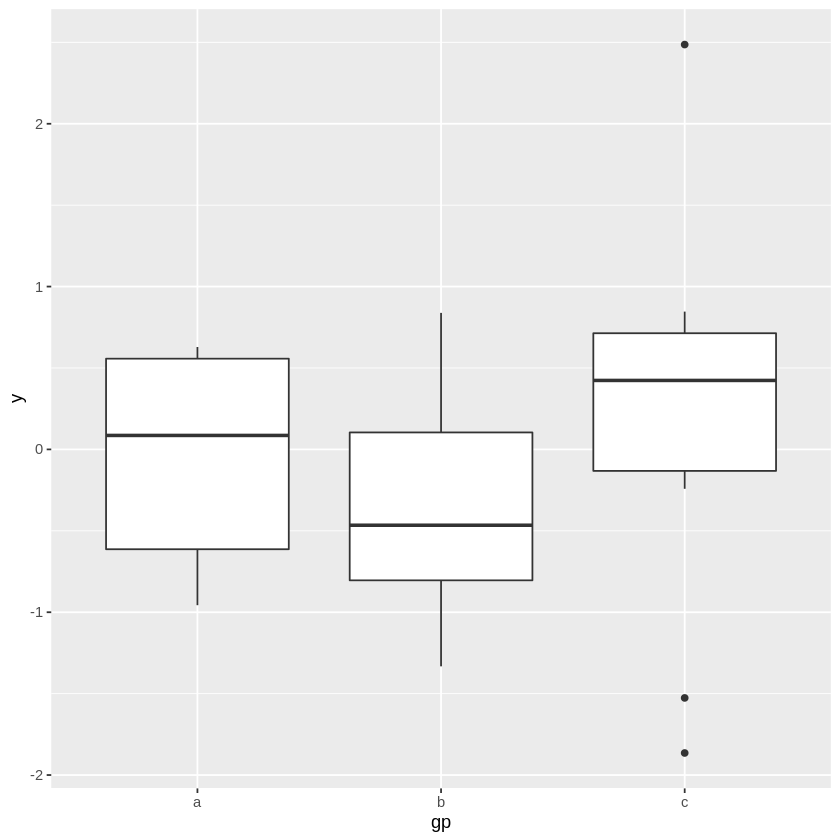

In [22]:
ggplot(df, aes(x = gp, y = y)) +geom_boxplot()

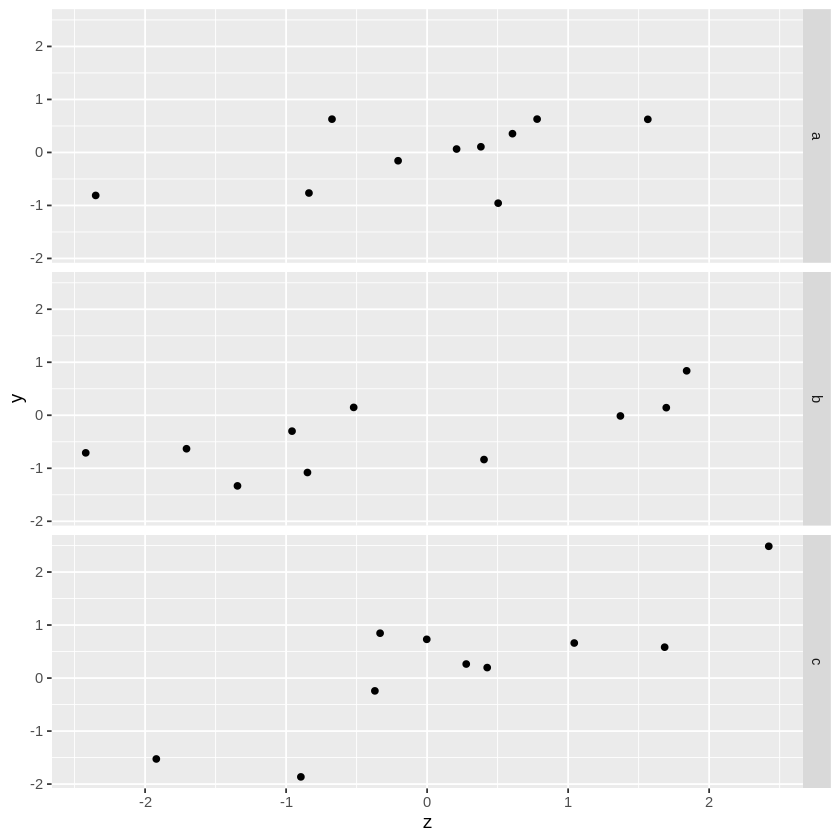

In [23]:
df$z<-df$y+rnorm(30)
ggplot(df, aes(x = z, y = y)) +geom_point()+facet_grid(gp~.)

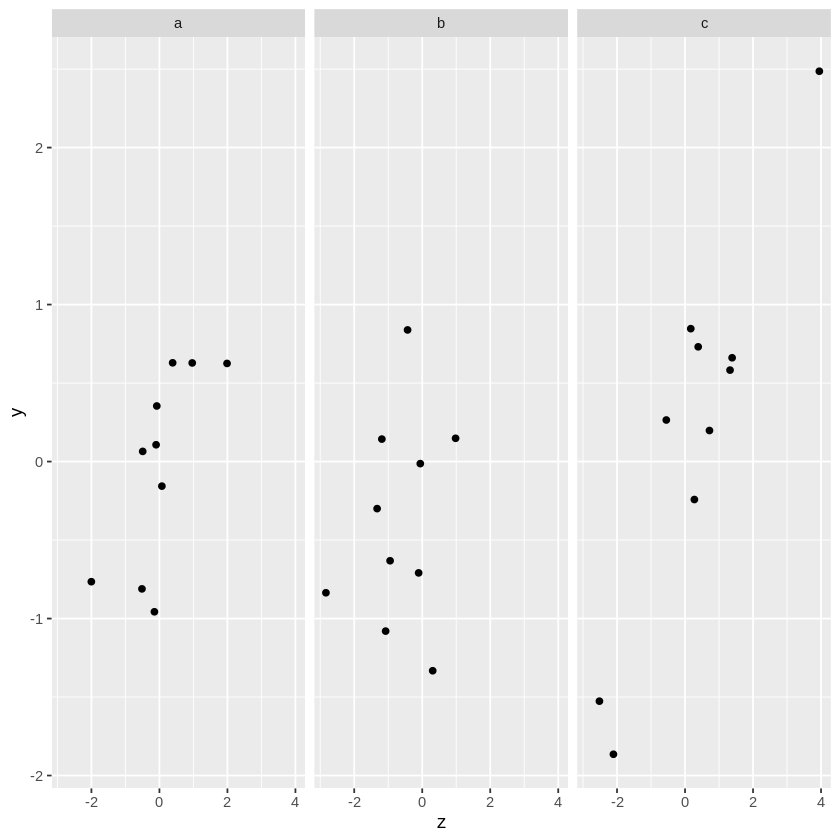

In [25]:
ggplot(df, aes(x = z, y = y)) +geom_point()+facet_grid(.~gp)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



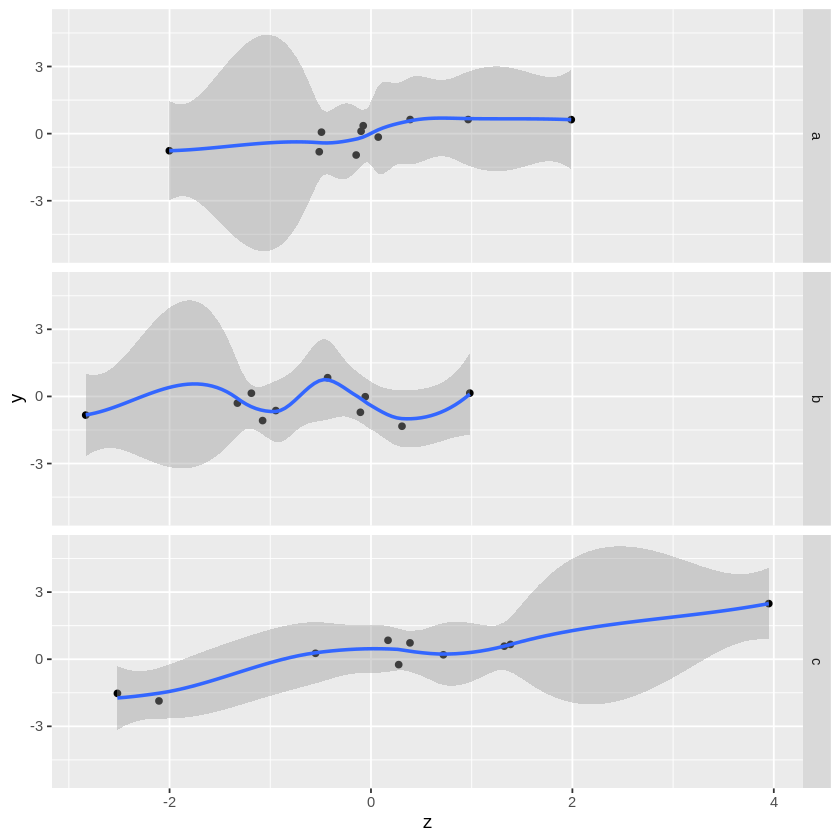

In [26]:
ggplot(df, aes(x = z, y = y)) +geom_point()+facet_grid(gp~.)+geom_smooth()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



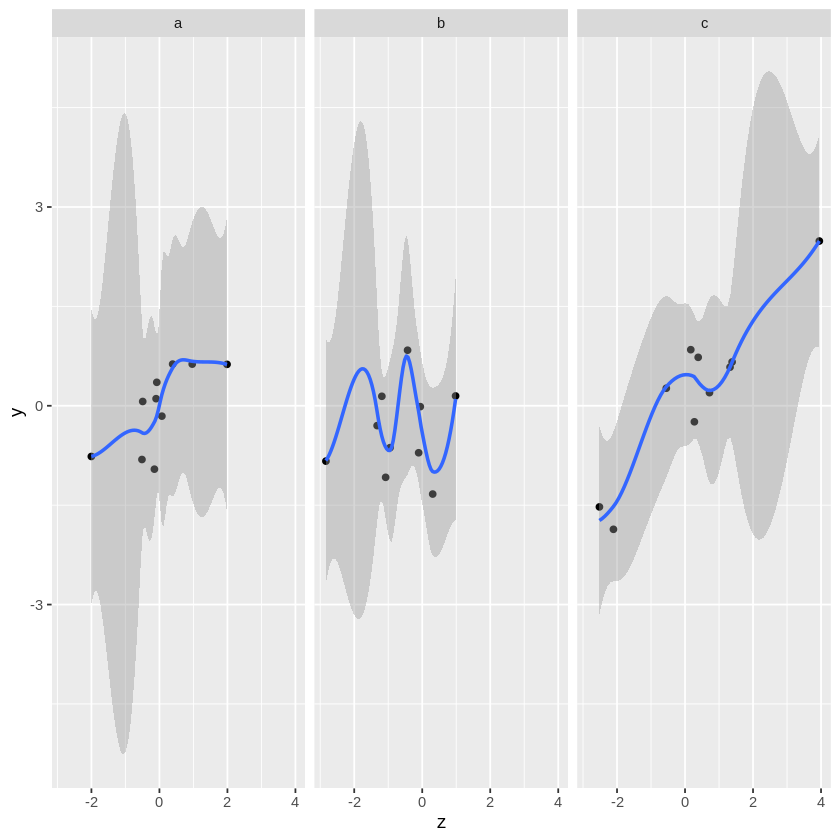

In [27]:
ggplot(df, aes(x = z, y = y)) +geom_point()+facet_grid(.~gp)+geom_smooth()

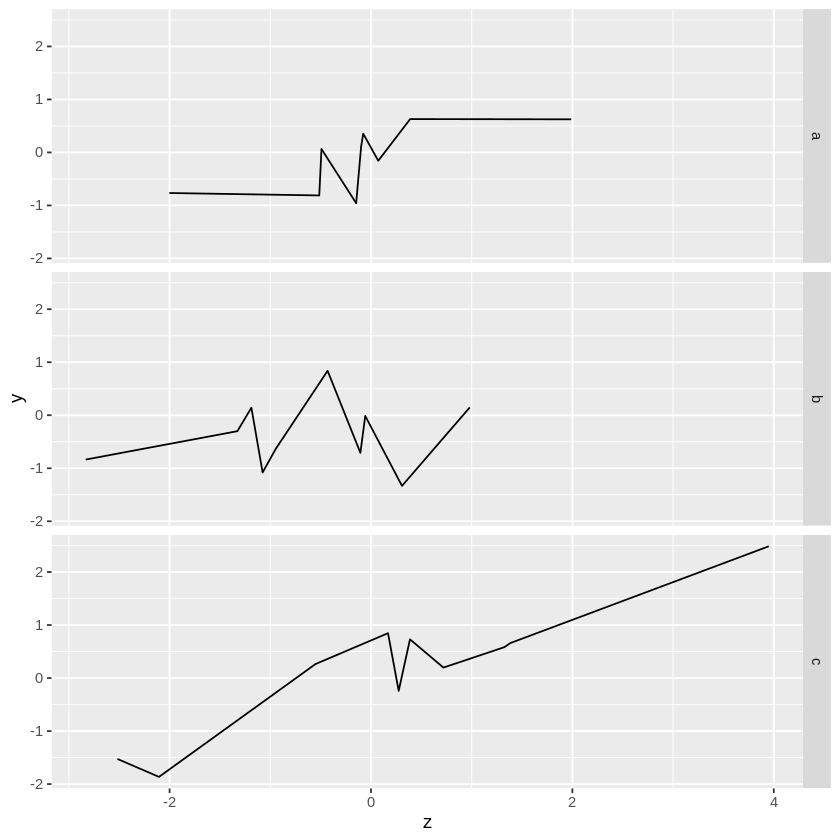

In [28]:
ggplot(df, aes(x = z, y = y)) +geom_line()+facet_grid(gp~.)

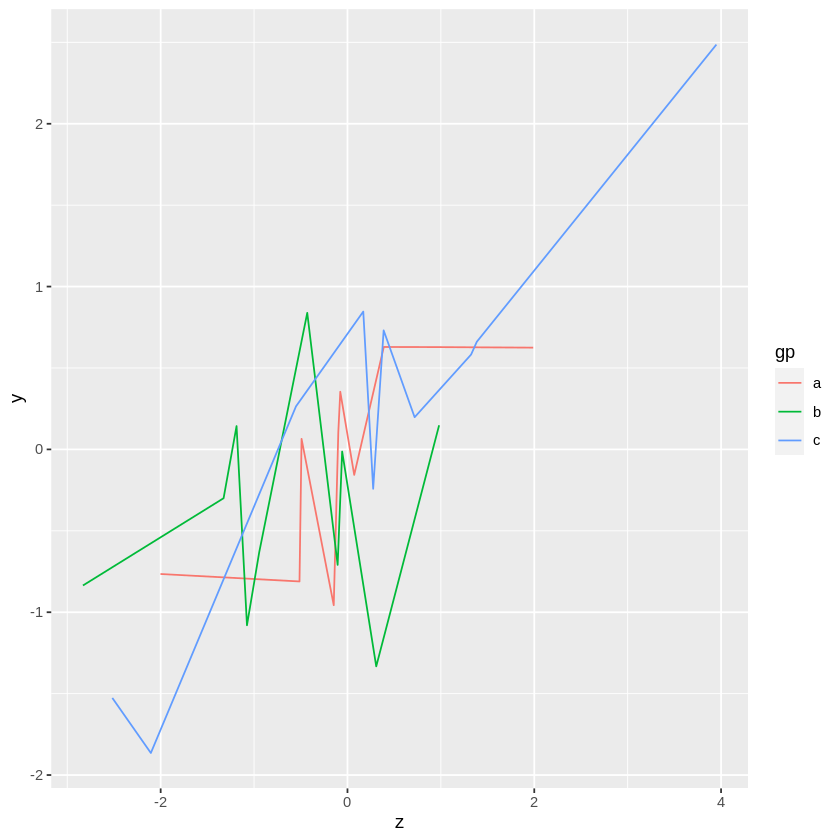

In [29]:
ggplot(df, aes(x = z, y = y,color=gp)) +geom_line()

In [41]:
install.packages("datasets")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”


In [42]:
install.packages("data.table")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("data.table"):
“installation of package ‘data.table’ had non-zero exit status”


In [44]:
library(datasets)
library(data.table)

In [47]:
airquality$Month<-as.factor(airquality$Month)

In [50]:
airquality.mean<-data.table(airquality)[,.(Ozonemean=mean(Ozone,na.rm=T)),by=Month]

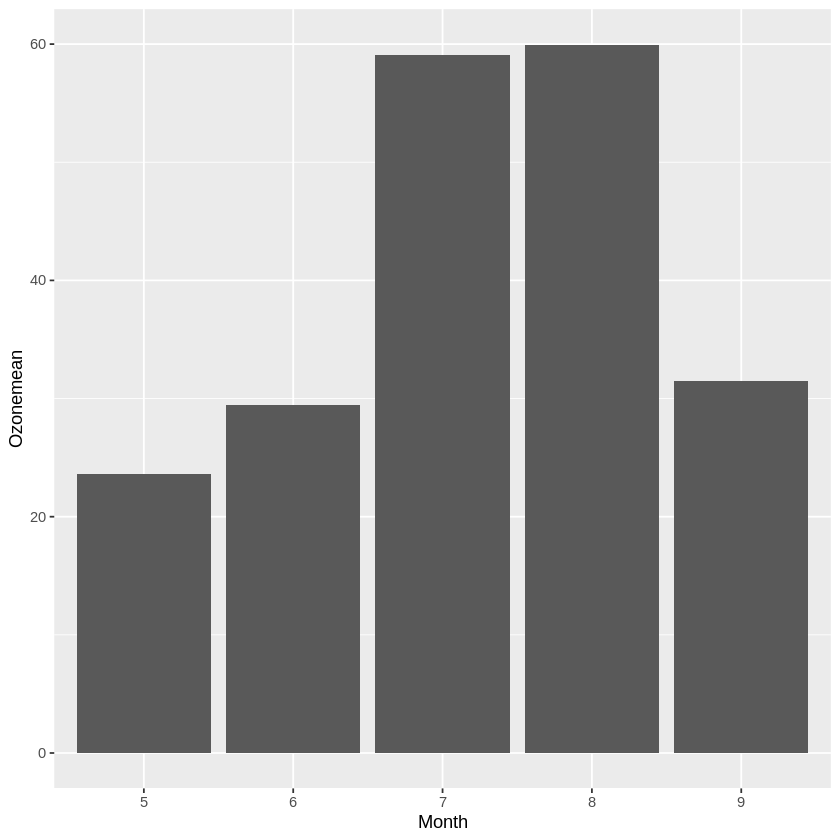

In [52]:
ggplot()+geom_bar(data=airquality.mean,aes(x=Month,y=Ozonemean),stat="identity")

In [53]:
library(datasets)
library(data.table)


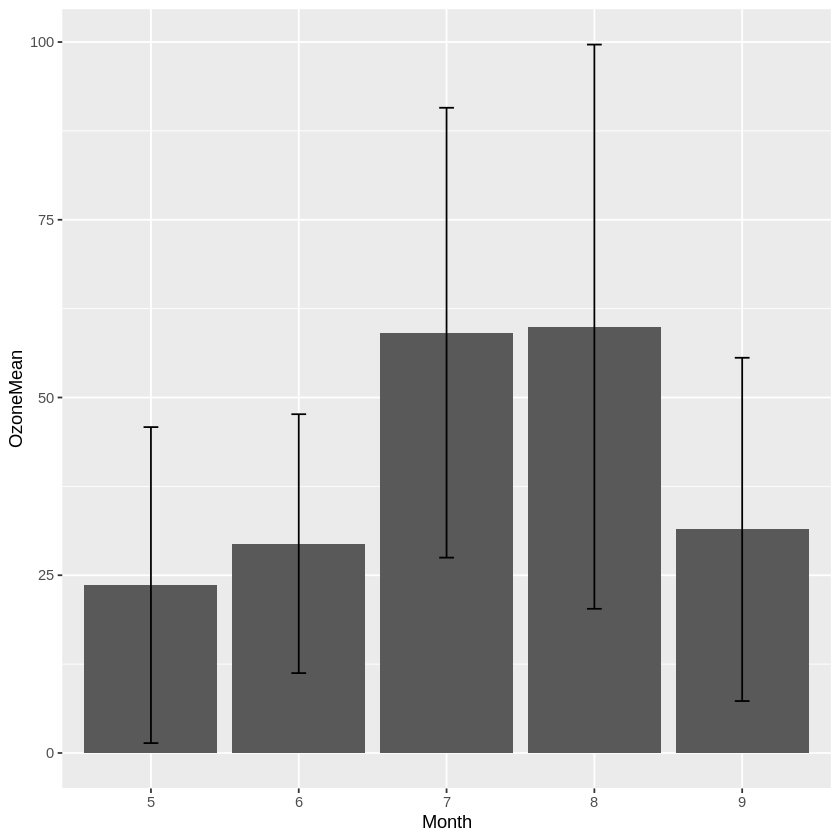

In [54]:
airquality.stat<-data.table(airquality)[,.(OzoneMean=mean(Ozone,na.rm=T),OzoneSD=sd(Ozone,na.rm=T)),by=Month]
ggplot(data=airquality.stat)+
  geom_bar(aes(x=Month,y=OzoneMean),stat="identity")+
  geom_errorbar(
    aes(x=Month,ymin=OzoneMean-OzoneSD,ymax=OzoneMean+OzoneSD),width=.1
  )